In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
from scipy import stats

from pydataset import data

from env import host, user, password

# 1  Statistical Distributions - Quick Look

### **Uniform Distribution**

- allows us to model events where the outcome is discrete, and each outcome has an equally likely chance of occurring.

### *What You Need*

Finite number of outcomes equally likely to happen.

### *So what?*

Allows you to construct a random variable that has an equal opportunity of being any one of the integers in the range you establish using the start (inclusive) and stop (exclusive) below.

### *Now What?*

`stats.randint(start, stop)`

### Binomial Distribution 

- allows us to model the number of successes after a number of trials, given a certain probability of success. This distribution assumes that each trial is independent. Discrete, upper bound by # of events

### *What You Need*

n = trials

p = p(success)

### *So what?*

returns the likelihood of successes

### *Now What?*

`stats.binom(n, p)`

### Normal Distribution 

- allows us to model a continuous random variable where the further away from the mean you are, the less likely the outcome.

### *What You Need*

mean

standard deviation

### *So what?*

The Standard Normal Distribution is a normal distribution with a mean of 0 and a standard deviation of 1.

### *Now What?*

`stats.norm(mean, standard deviation)`

### Poisson Distribution
- allows us to model a situation where a certain number of events happen over a specified time interval. This distribution assumes that the events are independent of each other. Continuous, not upper bound. Can go off into ∞
 
### *What You Need*

average rate

### *So what?*

Returns the number of events that can be classified as successes or failures.

### *Now What?*

`stats.poisson(average rate)`

**PDF** (Probability Density Function) / **PMF** (Probability Mass Function) - The probability that your random variable takes on an **EXACT** value.

`distribution.pdf(probability/continuous)`

`distribution.pmf(value/discrete)`

**CDF** (Cumulative Density Function) / **PPF** (Percent Point Function) - The probability that your random variable takes on a value **less than or equal to** a given point.

`distribution.cdf(value/discrete)`

`distribution.ppf(probability/continuous)`

**SF** (Survival Function) / **ISF** (Inverse Survival Function) - The probability that your random variable takes on a value **greater than** a given point.

`distribution.sf(value/discrete)`

`distribution.isf(probability/continuous)`

# 2 The Central Limit Theorem - Proof of Concept

## What's so important about The Central Limit Theorem?

If we repeatedly take random samples of the same size from a the same population, and compute the sample mean for each of the samples, the sampling distribution of the sample means will be a normal distribution no matter what the initial distribution of the population was.

Even if our original population has a skewed distribution, our sampling distribution will be normal if we have a large enough sample!

## *So what?!*

In hypothesis testing, the assumption is that our data is from a normal distribution. In real life, our data is usually NOT normally distributed! (Think of the salaries in the Employees database or the home values in the Zillow database.)

## *Now What?*

The Central Limit Theorem and an appropriate sample size allow us to get around the problems of skewed, real-world data distributions, assume our sample data is normally distributed, and run our hypotheses tests.

In [10]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

In [18]:
# Create 2-d array of random numbers between 1 and 6 to represent ten dice rolls for each column

dataset = np.random.randint(1, 7, (nrows, ncols))

dataset[:4]

array([[2, 6, 3, 2, 4, 6, 1, 2, 2, 4],
       [6, 6, 2, 5, 2, 1, 2, 5, 2, 2],
       [6, 1, 1, 1, 2, 4, 2, 4, 6, 2],
       [3, 2, 3, 3, 1, 5, 4, 3, 6, 1]])

In [19]:
# Calculate the average for each set of 10 dice rolls

calculated_averages = dataset.mean(axis=1)
calculated_averages

array([3.2, 3.3, 2.9, 3.1, 2.8, 3.7, 3.1, 3.1, 4.5, 2.7, 4.3, 3.5, 3.8,
       2.6, 4.5, 3. , 3.5, 2.9, 3. , 3.4, 3.7, 2.8, 3.7, 3.5, 4.6, 4.2,
       3.6, 2.3, 4.2, 4.1, 4.4, 3.1, 4.2, 4.1, 3.7, 3.1, 3.7, 2.8, 3.7,
       3.8, 2.7, 4.1, 2.8, 3.1, 3.7, 3.3, 2.3, 3.8, 4.2, 3.9, 4. , 4.1,
       3. , 4.2, 3.8, 2.7, 4.4, 3.8, 3.1, 2.7, 2.6, 4. , 3.1, 4.2, 3.7,
       3.2, 4.2, 3.1, 3.7, 3.4, 3.7, 4.4, 4.1, 3.4, 2.8, 3. , 3.2, 4.3,
       3.2, 2.9, 4. , 3.7, 3.6, 2.9, 3.8, 3.8, 3.6, 3.5, 4.5, 3.7, 2. ,
       2.7, 3.8, 4.1, 3.6, 3.3, 3.4, 4.6, 3.3, 3.7])

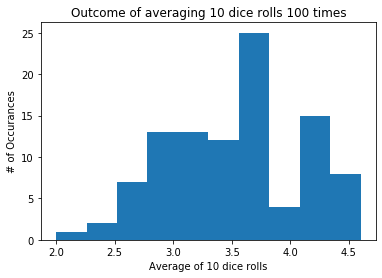

In [20]:
# Visualize the distribution of the 100 oberservations of 10 dice rolls

plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()

3  Hypothesis Testing - Overview
What is Hypothesis Testing?
We use hypothesis tests to draw conclusions, answer questions, or interpret beliefs we have about a population using sample data.
A hypothesis test evaluates two mutually exclusive statements about a population and informs us which statement is best supported by our sample data.
𝐻0
H
0
 : There is no difference between smokers' tips and the overall population's tip average.
𝐻𝑎
H
a
 : There is a difference between smokers' tips and the overall population's tip average.
So what?!
There are two possible outcomes; if the result confirms the hypothesis, then you've made a measurement. If the result is contrary to the hypothesis, then you've made a discovery - Enrico Fermi
Now What?
Set up a hypothesis.
Calculate a test statistic.
Find a p-value from the test statistic.
Reject or fail to reject your Null hypothesis

# 3 Hypothesis Testing - Overview

## What is Hypothesis Testing?

We use hypothesis testing to draw conclusions, answer questions, or interpret beliefs we have about a population using sample data.

A hypothesis test evaluates two mutually exclusive statements about a population and informs us which statement is best supported by our sample data.

> - $H_0$: There is no difference between smokers' tips and the overall population's tip average.
 
> - $H_a$: There is a difference between smokers tips and the overall population's tip average.
 
 ## *So what?!*
 
*There are two possible outcomes; if the result confirms the hypothesis, then you've made a measurement. If the result is contrary to the hypothesis, then you've made a discovery - Enrico Fermi*

## *Now what?!*

> 1. Setup a hypothesis.
1. Calculate a test statistic.
1. Find a p-value from the test statistic.
1. Reject or fail to reject your Null hypothesis.